<a href="https://colab.research.google.com/github/luisgdelafuente/games/blob/main/tic-tac-toe%20n%20times.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Your turn:
Enter your move (x,y,z): 1,1,1


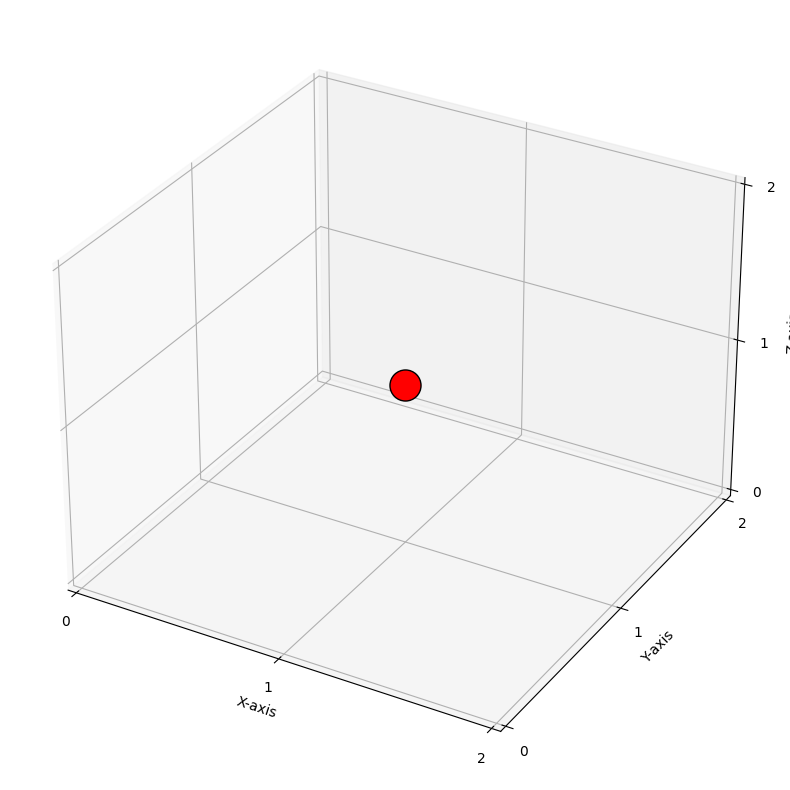

AI's turn:


<Figure size 640x480 with 0 Axes>

Your turn:


KeyboardInterrupt: ignored

In [1]:

    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    plt.draw()
    plt.pause(0.5)

def human_move(board):
    while True:
        try:
            move = input("Enter your move (x,y,z): ")
            x, y, z = map(int, move.strip().split(","))
            if 0 <= x < 3 and 0 <= y < 3 and 0 <= z < 3 and board[x][y][z] == ' ':
                return x, y, z
            else:
                print("Invalid move. Please enter coordinates between 0 and 2, separated by commas.")
        except ValueError:
            print("Invalid input format. Please enter coordinates as x,y,z.")

def check_winner_3d(board, player):
    for i in range(3):
        if any(all(board[i][j][k] == player for k in range(3)) for j in range(3)) or \
           any(all(board[j][i][k] == player for k in range(3)) for j in range(3)) or \
           all(board[j][j][i] == player for j in range(3)) or \
           all(board[j][2-j][i] == player for j in range(3)):
            return True
    if all(board[i][i][i] == player for i in range(3)) or \
       all(board[i][i][2-i] == player for i in range(3)) or \
       all(board[i][2-i][i] == player for i in range(3)) or \
       all(board[2-i][i][i] == player for i in range(3)):
        return True
    return False

def is_board_full_3d(board):
    return all(board[i][j][k] != ' ' for i in range(3) for j in range(3) for k in range(3))

def ai_move_3d(board, player):
    available_moves = [(i, j, k) for i in range(3) for j in range(3) for k in range(3) if board[i][j][k] == ' ']
    move = random.choice(available_moves)
    board[move[0]][move[1]][move[2]] = player

def find_winning_or_blocking_move(board, player):
    opponent = 'O' if player == 'X' else 'X'
    for i in range(3):
        for j in range(3):
            for k in range(3):
                if board[i][j][k] == ' ':
                    board[i][j][k] = player
                    if check_winner_3d(board, player):
                        return i, j, k
                    board[i][j][k] = opponent
                    if check_winner_3d(board, opponent):
                        return i, j, k
                    board[i][j][k] = ' '
    return None

def strategic_ai_move_3d(board, player):
    move = find_winning_or_blocking_move(board, player)
    if move:
        board[move[0]][move[1]][move[2]] = player
        return
    move = find_winning_or_blocking_move(board, 'O' if player == 'X' else 'X')
    if move:
        board[move[0]][move[1]][move[2]] = player
        return
    if board[1][1][1] == ' ':
        board[1][1][1] = player
        return
    ai_move_3d(board, player)

def play_3d_game_with_human():
    board = initialize_3d_board()
    players = ['X', 'O']
    turn = 0
    winner = None
    while not winner and not is_board_full_3d(board):
        player = players[turn % 2]
        if player == 'X':
            print("Your turn:")
            x, y, z = human_move(board)
            board[x][y][z] = player
        else:
            print("AI's turn:")
            strategic_ai_move_3d(board, player)
        draw_3d_board(board)
        if check_winner_3d(board, player):
            winner = player
        turn += 1
    if winner == 'X':
        print("Congratulations! You win!")
    elif winner == 'O':
        print("Machine wins!")
    else:
        print("It's a draw!")

play_3d_game_with_human()


In [6]:
import random
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

# Function to initialize the board
def initialize_board():
    return [[' ' for _ in range(3)] for _ in range(3)]

# Function to draw the Tic Tac Toe board
def draw_board(board, ax):
    ax.cla()  # Clear the previous board
    ax.matshow(np.zeros((3, 3)), cmap="Blues", vmin=-1, vmax=1)

    for i in range(3):
        for j in range(3):
            c = board[i][j]
            ax.text(j, i, c, va='center', ha='center', fontsize=36)

    ax.set_xticks([0.5, 1.5, 2.5])
    ax.set_xticklabels([])
    ax.set_yticks([0.5, 1.5, 2.5])
    ax.set_yticklabels([])
    ax.grid(color='black')

# Function to check if there's a winner
def check_winner(board, player):
    # Check rows, columns, and diagonals
    for i in range(3):
        if all([board[i][j] == player for j in range(3)]) or \
           all([board[j][i] == player for j in range(3)]):
            return True

    if all([board[i][i] == player for i in range(3)]) or \
       all([board[i][2 - i] == player for i in range(3)]):
        return True

    return False

# Function to check if the board is full
def is_board_full(board):
    return all(board[i][j] != ' ' for i in range(3) for j in range(3))

# AI logic to make a move
def ai_move(board, player):
    available_moves = [(i, j) for i in range(3) for j in range(3) if board[i][j] == ' ']
    move = random.choice(available_moves)
    board[move[0]][move[1]] = player

def interactive_play_game():
    board = initialize_board()
    players = ['X', 'O']
    turn = 0
    winner = None

    # Create an output widget to display the game board
    out = widgets.Output()
    display(out)

    while not winner and not is_board_full(board):
        with out:
            clear_output(wait=True)
            fig, ax = plt.subplots(figsize=(6, 6))
            player = players[turn % 2]
            ai_move(board, player)
            draw_board(board, ax)
            plt.show()

            if check_winner(board, player):
                winner = player
            turn += 1

    with out:
        if winner:
            print(f"Player {winner} wins!")
        else:
            print("It's a draw!")

# Run the game
interactive_play_game()


Output()

In [7]:
# ... [previous functions remain unchanged]

def run_games(n):
    results = {"X": 0, "O": 0, "Draw": 0}

    for i in range(n):
        print(f"Playing game {i + 1}...")
        winner = interactive_play_game()
        results[winner] += 1

    # Display summary
    print("\nSummary:")
    for key, value in results.items():
        print(f"{key}: {value} wins")

def interactive_play_game():
    board = initialize_board()
    players = ['X', 'O']
    turn = 0
    winner = None

    # Create an output widget to display the game board
    out = widgets.Output()
    display(out)

    while not winner and not is_board_full(board):
        with out:
            clear_output(wait=True)
            fig, ax = plt.subplots(figsize=(6, 6))
            player = players[turn % 2]
            ai_move(board, player)
            draw_board(board, ax)
            plt.show()

            if check_winner(board, player):
                winner = player
            turn += 1

    with out:
        if winner:
            print(f"Player {winner} wins!")
        else:
            print("It's a draw!")
            winner = "Draw"

    return winner

# Example: Run the game 5 times
run_games(5)


Playing game 1...


Output()

Playing game 2...


Output()

Playing game 3...


Output()

Playing game 4...


Output()

Playing game 5...


Output()


Summary:
X: 3 wins
O: 0 wins
Draw: 2 wins


In [14]:
def run_games(n):
    results = {"X": 0, "O": 0, "Draw": 0}

    # Create an output widget to display the game board once
    out = widgets.Output()
    display(out)

    for i in range(n):
        print(f"Playing game {i + 1}...")
        winner = interactive_play_game(out)
        results[winner] += 1

    # Display summary
    print("\nSummary:")
    for key, value in results.items():
        print(f"{key}: {value} wins")

def interactive_play_game(out):
    board = initialize_board()
    players = ['X', 'O']
    turn = 0
    winner = None

    while not winner and not is_board_full(board):
        with out:
            clear_output(wait=True)
            fig, ax = plt.subplots(figsize=(6, 6))
            player = players[turn % 2]
            ai_move(board, player)
            draw_board(board, ax)
            plt.show()

            if check_winner(board, player):
                winner = player
            turn += 1

    with out:
        if winner:
            print(f"Player {winner} wins!")
        else:
            print("It's a draw!")
            winner = "Draw"

    return winner

# Example: Run the game 5 times
run_games(5)


Output()

Playing game 1...
Playing game 2...
Playing game 3...
Playing game 4...
Playing game 5...

Summary:
X: 2 wins
O: 3 wins
Draw: 0 wins
